# Chapter 12 - Introducing deep learning for time series forecasting

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union
from pathlib import Path

from matplotlib import pyplot as plt, dates as mdates
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# omd
import datetime
import importlib
import sys

sys.path.append('../../My-Code/')

import timetools as tt
import omdutils as omd

importlib.reload(tt)

path = Path('/home/oliver/Documents/Data')
print('timetools version: {}'.format(tt.__version__))
print('omdutils version: {}'.format(omd.__version__))
print('statsmodels version: {}'.format(sm.__version__))

timetools version: 10.09.2022
omdutils version: 8.6.2022
statsmodels version: 0.13.2


In [4]:
# run this cell only once to save dataset in database 
df = pd.read_csv('../data/Metro_Interstate_Traffic_Volume.csv')
df.head()
omd.to_sqlite(df, 'Metro_Interstate_Traffic_Volume', str(path / 'Datasets'))

In [5]:
# run this cell only once to save dataset in database 
df = pd.read_csv('../data/metro_interstate_traffic_volume_preprocessed.csv')
df.head()
omd.to_sqlite(df, 'metro_interstate_traffic_volume_preprocessed', str(path / 'Datasets'))

In [9]:
df = omd.from_sqlite('select * from metro_interstate_traffic_volume_preprocessed', str(path / 'Datasets'))
df['date_time'] = pd.to_datetime(df['date_time'])
# df.reset_index('date_time', inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17551 entries, 0 to 17550
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_time       17551 non-null  datetime64[ns]
 1   temp            17551 non-null  float64       
 2   rain_1h         17551 non-null  float64       
 3   snow_1h         17551 non-null  int64         
 4   clouds_all      17551 non-null  int64         
 5   traffic_volume  17551 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 822.8 KB


,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,2016-09-29 17:00:00,291.75,0.0,0,0,5551.0
1,2016-09-29 18:00:00,290.36,0.0,0,0,4132.0
2,2016-09-29 19:00:00,287.86,0.0,0,0,3435.0
3,2016-09-29 20:00:00,285.91,0.0,0,0,2765.0
4,2016-09-29 21:00:00,284.31,0.0,0,0,2443.0


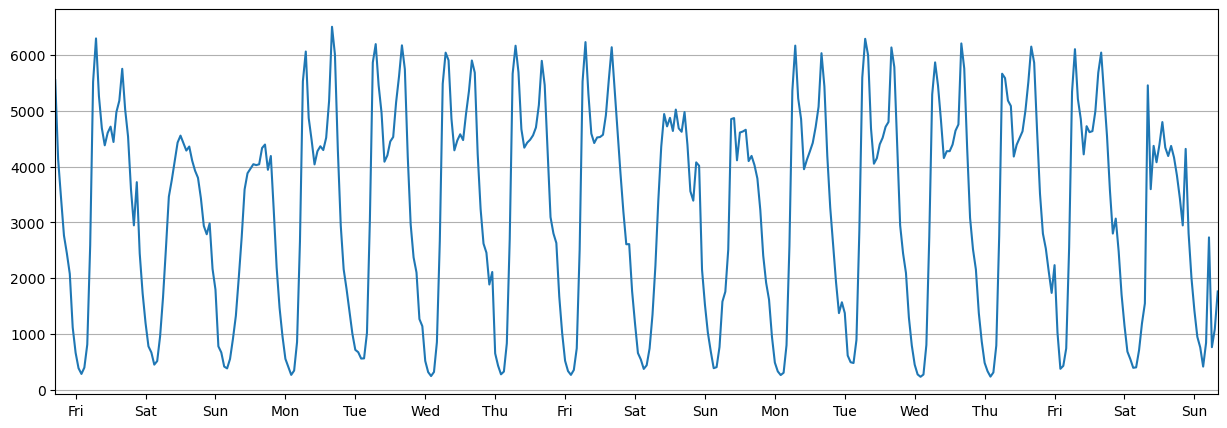

In [32]:
from matplotlib.dates import DayLocator

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df[:400]['date_time'], df[:400]['traffic_volume'])
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
date_form = mdates.DateFormatter("%a")
ax.xaxis.set_major_formatter(date_form)
ax.margins(x=0)
ax.grid(axis='y')
plt.show()